# Line equation

## From previous homework

In [202]:
theta_0 = 0.2
theta_1 = 0.3
variance = 1.5
import numpy as np
import math

#### Generate 100 points uniform randomly in range [-50,50] and assign it to X1


In [203]:
X1 = np.random.uniform(-50,50,100)

####  Generate respectively 'y's normally distributed with standart deviation sqrt(variance) around line theta_0+theta_1*x and assign it to Y

In [204]:
Y = theta_0+theta_1*X1 + np.random.normal(-math.sqrt(variance),math.sqrt(variance), 100)
Y1 = theta_0+theta_1*X1


#### Scatter plot (x,y)

In [205]:
import matplotlib.pyplot as plt
%matplotlib inline


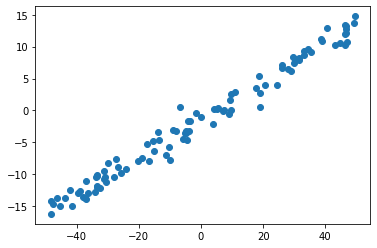

In [206]:
plt.scatter(X1,Y)

## Implement closed form solution

#### Add 1 next to each row ( 1 corresponds to theta_0*x_0 where x_0-s are 1 (this becomes clear during the next lecture)).  Assign the result to variable X and assure that X is an array

In [207]:


X=np.hstack(( np.ones((100,1)),X1.reshape(100,1)))

#### Create fit_linear_regression(X, Y) function which implements formula (inverse_of(X_transpose*X))*X_transpose*Y, i.e. 
* theta0_est, theta1_est= fit_linear_regression(X, Y)


In [208]:
def fit_linear_regression(X,Y):
    return(np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y))
theta0_est, theta1_est = fit_linear_regression(X,Y)

 Plot two lines on the same plot based on original theta0, theta1 and calculated theta0_est, theta1_est, i.e. write a function which looks like this: plot_line(theta_0, theta_1 X, Y)

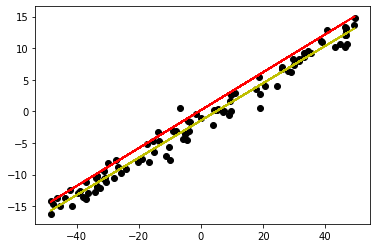

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_line(theta_0, theta_1, X, Y):
    plt.plot(X,Y,'r')
    y1 =  theta_0+theta_1*X
    plt.plot(X,y1,'y')
plot_line(theta0_est, theta1_est,X1,Y1)
plt.scatter(X1,Y,color = 'black')

## Implement Gradient Descent solution

In [210]:
theta5d = [1.2, 2.3, 3.5, 4.1, 1.7, 3.8]

#### Generate 100 points in the range [-1,-1] for 5 features, i.e. x.shape = (100,5). Add 1 next to each row for each feature. Fianlly generate corresponding y normally distributed around x.dot(theta) line with sigma = 2.

In [211]:
x1 = np.linspace(-1,1,100)
x = np.array([np.linspace(-1,1,100),np.linspace(-1,1,100),np.linspace(-1,1,100),np.linspace(-1,1,100),np.linspace(-1,1,100)])
x.shape = (100,5)
x=np.hstack(( np.ones((100,1)),x))


In [212]:
#y =np.matmul(theta5d,np.transpose(x))  
y = x.dot(theta5d) + np.random.normal(-2,2, 100)

* Implement fit_ridge_regression(X, Y, l). For the begining set l = 0., afterwards change it to gain intuition

In [213]:
l=0.124 #thetas = inv(xTx + l*I) * xTy


In [214]:
def fit_ridge_regression(x,y,l):
    Xt = np.transpose(x)
   # print(Xt)
    XtX = np.matmul(Xt,x) + l * np.identity(x.shape[1])
   # print(XtX)
    thetas =np.matmul(np.matmul(np.linalg.inv(XtX),Xt), y)
    return thetas

In [215]:
theta_hat_analytic = fit_ridge_regression(x, y, l)
theta_hat_analytic

array([-0.78983429,  2.99632334,  2.98036709,  2.96441084,  2.9484546 ,
        2.93249835])

* gradient_descent(X, Y, l, epsilon=1e-9, learning_rate=1e-4,max_steps=20000):

In [216]:
def gradient_descent(X, Y, l,  epsilon=1e-9, learning_rate=1e-4,max_steps=20000):
    """
    Implement gradient descent using the value of the gradient
    divided by number of samples.

    :param X: data matrix
    :param Y: target variables
    :param l: regularization parameter lambda
    :param epsilon: approximation strength
    :param learning_rate: learning rate of the algorithm
    :param max_steps: maximum number of iterations before algorithm will
        terminate.
    :return: value of beta (1 dimensional np.array)
    """
    iterr = 0
    n = x.shape[1]
    thetas = np.ones(n)
    
    while iterr < max_steps:
        y_est = X.dot(thetas)
        error = y_est - Y
        loss =  (1/2) *np.sum( error ** 2)
        if loss < epsilon:
            break
        gradient = X.T.dot(error)
        thetas = thetas - learning_rate*gradient
        iterr += 1
    return thetas

In [217]:
theta_hat_grad = gradient_descent(x, y, l=l, epsilon=1e-9, learning_rate=1e-3,max_steps=20000)
theta_hat_grad

array([-0.78674508,  3.03876961,  3.00267375,  2.96657789,  2.93048203,
        2.89438617])

In [218]:
import random

* stochastic_gradient_descent(X, Y, l, epsilon=1e-9, learning_rate=1e-4,max_steps=20000)

In [219]:
    
def stochastic_gradient_descent(X, y, epsilon=1e-9 ,learning_rate = 1e-4,max_steps=20000):
 
    thetas = np.ones(X.shape[1]) 
    b = 0
    n = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(max_steps):    
        random_index = random.randint(0,n-1) 
        sample_x = X[random_index]
        sample_y = y[random_index]
        
        y_est = np.dot(thetas, sample_x.T) 
        loss = (1/2) * (y_est - sample_y)**2
        if loss < epsilon:
            break
        grad = (sample_x.T.dot(y_est-sample_y))
        thetas = thetas - learning_rate * grad

    return thetas,loss

In [220]:
theta_hat_grad_st = stochastic_gradient_descent(x,y, epsilon=1e-9, learning_rate=1e-3,max_steps=20000)
theta_hat_grad_st


(array([-0.84482026,  3.04530738,  3.00803829,  2.97076919,  2.9335001 ,
         2.896231  ]),
 0.6613284753110575)

#### Implement k-fold (k=5) cross validation and use stochastic_gradient_descent for fitting and the theta parameter detection on each validation set. Return all 5 outputs, alongside with the averaged over 5 folds. Also calculate the loss for each fold and return the average.

In [221]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
avg = 0
for train_index, test_index in kf.split(x):
    x_train = x[train_index]
    y_train = y[train_index]
    res = stochastic_gradient_descent(x_train,y_train)
    print(res)
    avg += res[1]
avg /= 5
print(avg)

(array([-0.3730893 ,  2.9242361 ,  2.89649693,  2.86875775,  2.84101857,
        2.81327939]), 7.284824784975484e-12)
(array([-0.53746174,  2.91099083,  2.879931  ,  2.84887116,  2.81781133,
        2.7867515 ]), 0.08491192423468377)
(array([-0.58862772,  2.99540183,  2.96330834,  2.93121485,  2.89912136,
        2.86702787]), 0.02985928266713498)
(array([-0.51292786,  2.97389565,  2.94333145,  2.91276725,  2.88220305,
        2.85163885]), 1.4601619954843492)
(array([-0.60520396,  2.94936879,  2.91694042,  2.88451206,  2.8520837 ,
        2.81965533]), 1.529287600406886)
0.6208441605600677


#### Let's go back to the last example of the previous homework, i.e. when generating sin(2*pi*x) function.
* 1. Generate both train and test data (test data are the yellow dots). Take for both N = 15 points.
* 2. Write a function that implements N-th order polynomial and run fit_ridge_regression on it.
* 3. Plot 5 plots with fitting with order 0, 1, 2, 3 and N-1 order polynomials.
* 4. Observe how the train and test errors change for each fit order(calculate and plot the U-shape).
* 5. Pay attantion on how wiggly the fit becomes at N-1 order when the regularization coefficient is 0. 

[[0.51690595 0.71896172 1.        ]
 [0.00913398 0.09557183 1.        ]
 [0.73035649 0.85460897 1.        ]
 [0.03134011 0.17703137 1.        ]
 [0.00635798 0.07973693 1.        ]
 [0.41789794 0.64645026 1.        ]
 [0.63537141 0.79710188 1.        ]
 [0.45218248 0.67244515 1.        ]
 [0.21968507 0.46870573 1.        ]
 [0.23871607 0.48858578 1.        ]
 [0.45482218 0.67440506 1.        ]
 [0.2770946  0.52639776 1.        ]
 [0.04659441 0.21585738 1.        ]
 [0.34633113 0.58849905 1.        ]
 [0.48762018 0.69829806 1.        ]]


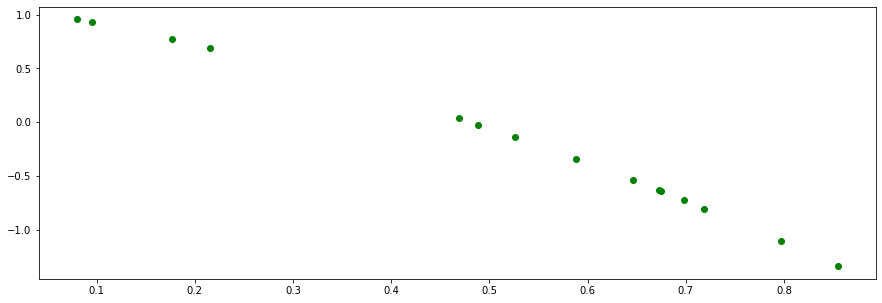

In [200]:
import numpy as np
import math
x= np.random.rand(30)

y = np.sin(2*np.pi*x)+np.random.normal(loc = 0.0,scale = 0.3,size=30)
np.random.shuffle(x)
x_train,x_test=x[:15],x[15:30]
#x.shape = (100,5)
y_t = y = np.sin(2*np.pi*x_train)+np.random.normal(loc = 0.0,scale = 0.3,size=15)
#x=np.hstack(( np.ones((100,1)),x))
def n_polynomial(x,n):
    arr = np.array([])
    x.shape = (15,1)
    if n != 0:
        for i in range(n+1):
            arr = np.hstack((x**i, x))
        arr = np.hstack((arr,np.ones_like(x)))
        return arr
    return(np.ones_like(x))
x_t = n_polynomial(x_train,2)
print(x_t)

thetas = fit_ridge_regression(x_t,y_t,l)
y_l = np.matmul(x_t,thetas.T)
fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(x_train,y_l,color = 'green')

#????

#### Assume you have N features (x1, x2,x...xN). Create n-th order polynomial for that features, i.e. for n = 2 and N = 2 you should have x1*x1, x1*x2, x2*x2 features. Afterwards concatenate both arrays.

In [ ]:
import itertools
#arr_elem = np.array([x1,x2,x3,x4,x5,x6])
n = 4
polynom = np.array([])
while n > 0:
    polynom_i = np.array([])
    for subset in itertools.product(arr_elem, repeat = n):
        mul = 1
        for i in subset:
            mul *= i
        polynom_i = np.append(polynom_i,mul)
    polynom = np.hstack([A,polynom_i])
    n -= 1
#I found all the posible combination of length n( n-1,..,1) calculated product and added to an array.      